In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [11]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
udara = ctrl.Antecedent(np.arange(0,38,1), 'Suhu Udara')
kelembaban = ctrl.Antecedent(np.arange(0,71,1), 'Kelembaban Tanah')
durasi = ctrl.Consequent(np.arange(0,91,1), 'Durasi Penyiraman')

In [4]:
udara['cool'] = fuzz.trimf(udara.universe, [0,7.5,15])
udara['normal'] = fuzz.trimf(udara.universe, [11,18.5,26])
udara['hot'] = fuzz.trimf(udara.universe, [22,29.5,37])

In [5]:
kelembaban['dry'] = fuzz.trimf(kelembaban.universe, [0,10,20])
kelembaban['moist'] = fuzz.trimf(kelembaban.universe, [15,32.5,50])
kelembaban['wet'] = fuzz.trimf(kelembaban.universe, [40,55,70])

In [6]:
durasi['short'] = fuzz.trimf(durasi.universe, [0,14,28])
durasi['medium'] = fuzz.trimf(durasi.universe, [20,34,48])
durasi['long'] = fuzz.trimf(durasi.universe, [40,65,90])

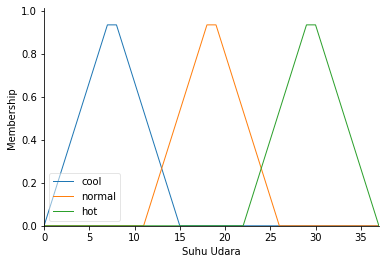

In [12]:
udara.view()

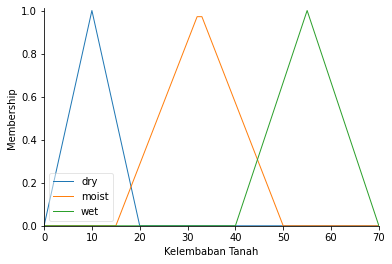

In [13]:
kelembaban.view()

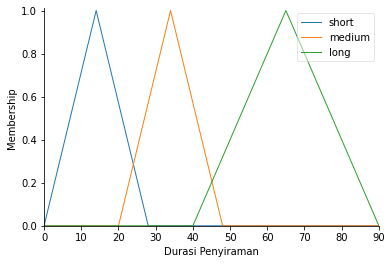

In [14]:
durasi.view()

In [8]:
rule1 = ctrl.Rule(udara['hot'] & kelembaban['dry'], durasi['long'])
rule2 = ctrl.Rule(udara['hot'] & kelembaban['moist'], durasi['medium'])
rule3 = ctrl.Rule(udara['normal'] & kelembaban['dry'], durasi['long'])
rule4 = ctrl.Rule(udara['normal'] & kelembaban['moist'], durasi['medium'])

In [9]:
penyiraman_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [10]:
durasi_penyiraman =  ctrl.ControlSystemSimulation(penyiraman_ctrl)

In [17]:
durasi_penyiraman.input['Suhu Udara'] = int(input('Suhu udara : '))
durasi_penyiraman.input['Kelembaban Tanah'] = int(input('Kelembaban Tanah : '))
durasi_penyiraman.compute()

Suhu udara : 28
Kelembaban Tanah : 18


55.499637023593515


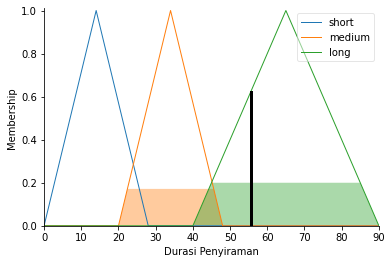

In [18]:
print(durasi_penyiraman.output['Durasi Penyiraman'])
durasi.view(sim=durasi_penyiraman)